<b>Explanation

Standard Scaler is a function on scikit learn which helps to normalize/standardize features and labels. It standardizes a feature or a label by substructing the mean and then scaling to unit variance. Unit variance means dividing all the values by the Standard Deviation 

It is under Preprocessing class in scikit-learn library

StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1

Documentation of StandardScaler on scikit-learn<br> https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Formula of StandardScaler: $$ z  = \frac{{x - \mu}}{{\sigma}} $$

Where: <br>
X - value <br>
$ \mu $ - Mean <br>
$ \sigma $ - Standard Deviation 

Formula of mean: $$ \mu = \frac{{1}} {{N}} \sum\limits_{i = 1}^N (x_i) $$

Where:<br>
N - total quantity of records <br>
x - value

Formula of Standard Deviation: $$ \sigma  = \sqrt {\frac{{1}} {{N}}}\sum\limits_{i = 1}^N (x_i-\mu) $$

You must already know all signs in Standard Deviation formula

<b>Implementation in python

This dataset is about the cars' features such as Model, Make and etc. <br>
MSRP is a price column which is the label and target for Standardization

In [0]:
#Loading the dataset
import pandas as pd
data = pd.read_csv("..\car_pred.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


I will first split the dataset into features and label and will Standardize the label which is car price.<br>
If you are not sure what features and labels are, then keep reading.<br>
Features are Independent variables which help to predict the label and it is usually stored in variable called X<br>
Label is Dependent variable which is the target for prediction and it is usually stored in a variable called y

In [0]:
X = data.iloc[:, :-1]
y = data['MSRP']

In [0]:
y.describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: MSRP, dtype: float64

In Normality Test lesson, we have checked that the price is not Normilized. Therefore, we can Normalize it now with StandardScaler

In [0]:
from scipy.stats import normaltest
stats, p = normaltest(y)

alpha = 0.05
if p > alpha:
    print('The Sample is Normally Distributed')
else:
    print('The Sample does not follow Normal Distribution')

The Sample does not follow Normal Distribution


As we can see, label is not Normally Distributed

Follow these steps to Normilize any feature or label:
<br>1) import the StandardScaler from sklearn.preprocessing
<br>2) Create an instance of StandardScaler
<br>3) Fit_transform the feature(or label)

In [0]:
y = y.values.reshape(-1,1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_price = StandardScaler()
y = scaler_price.fit_transform(y)

C:\Users\Umerenter123\conda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Umerenter123\conda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
stats, p = normaltest(y)

alpha = 0.05
if p > alpha:
    print('The Sample is Normally Distributed')
else:
    print('The Sample does not follow Normal Distribution')

The Sample does not follow Normal Distribution


In [0]:
stats, p = normaltest(y)
p

array([0.])

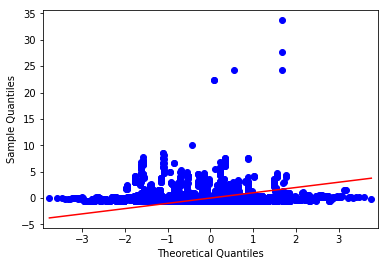

In [0]:
from statsmodels.graphics.gofplots import qqplot
qqplot(y, line='s')
plt.show()